In [1]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from scipy.spatial.distance import pdist, squareform

[[0.69646919 0.28613933]
 [0.22685145 0.55131477]
 [0.71946897 0.42310646]
 [0.9807642  0.68482974]
 [0.4809319  0.39211752]
 [0.34317802 0.72904971]
 [0.43857224 0.0596779 ]
 [0.39804426 0.73799541]
 [0.18249173 0.17545176]
 [0.53155137 0.53182759]
 [0.63440096 0.84943179]
 [0.72445532 0.61102351]
 [0.72244338 0.32295891]
 [0.36178866 0.22826323]
 [0.29371405 0.63097612]
 [0.09210494 0.43370117]
 [0.43086276 0.4936851 ]
 [0.42583029 0.31226122]
 [0.42635131 0.89338916]
 [0.94416002 0.50183668]
 [0.62395295 0.1156184 ]
 [0.31728548 0.41482621]
 [0.86630916 0.25045537]
 [0.48303426 0.98555979]
 [0.51948512 0.61289453]
 [0.12062867 0.8263408 ]
 [0.60306013 0.54506801]
 [0.34276383 0.30412079]
 [0.41702221 0.68130077]
 [0.87545684 0.51042234]
 [0.66931378 0.58593655]
 [0.6249035  0.67468905]
 [0.84234244 0.08319499]
 [0.76368284 0.24366637]
 [0.19422296 0.57245696]
 [0.09571252 0.88532683]
 [0.62724897 0.72341636]
 [0.01612921 0.59443188]
 [0.55678519 0.15895964]
 [0.15307052 0.69552953]


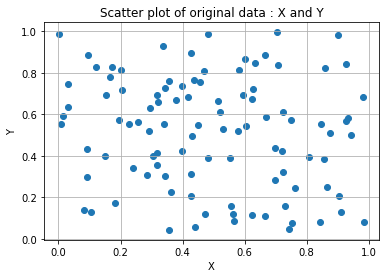

In [2]:
# set the random seed for reproducibility
np.random.seed(123)

# generate a random dataset with 2 columns and 100 samples
X = np.random.rand(100, 2)

# print the first 5 rows of the dataset
print(X)

og_data = pd.DataFrame({'X': X[:, 0], 'Y': X[:, 1]})
s_row, s_col = og_data.shape
cols = list(og_data.columns)

# Print the DataFrame
print(og_data)
print(f'\nNo of samples : {s_row}\nNo of features(dimensions) : {s_col}')

# Create a scatter plot
plt.scatter(og_data['X'], og_data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter plot of original data : X and Y')
plt.show()

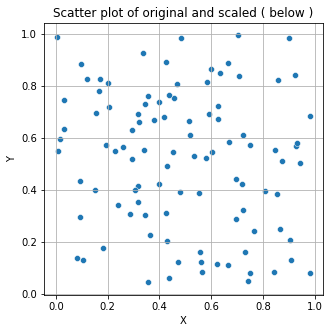

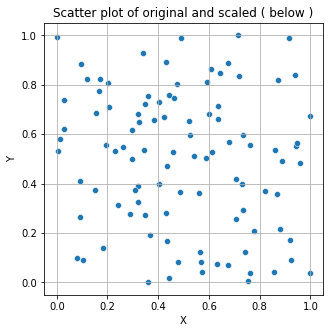

In [3]:
# ----- Scale Data - Min-Max -----

scaler = MinMaxScaler(feature_range=(0, 1))
x = pd.DataFrame(scaler.fit_transform(og_data))
x.columns = cols

plots = [og_data, x]
for i in plots:
    # Set the figure size
    plt.figure(figsize=(5, 5))
    # Create a scatter plot
    sns.scatterplot(x=i['X'], y=i['Y'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.title(f'Scatter plot of original and scaled ( below )')
    plt.show()    

In [4]:
## ----------- MEDIAN ABSOLUTE DEVIATION (MAD) correlation matrix ---------------

def compute_median_absolute_deviation(df):
    return df.apply(lambda col: np.absolute(col - col.median()))

def generate_corr_elems(columns):
    comb = permutations(columns, 2)
    perms = list(comb)
    diag = [(col, col) for col in columns]
    return diag + perms

def compute_corr_matrix_values(df, corr_elems):
    corr_values = []
    for elem in corr_elems:
        corr_values.append(df[elem[0]].append(df[elem[1]], ignore_index=True).median(axis=0))
    return corr_values

def construct_corr_matrix(corr_values, num_columns):
    matrix = np.diag(corr_values[:num_columns])
    k = 0
    for i in range(num_columns):
        for j in range(num_columns):
            if i != j:
                matrix[i, j] = corr_values[num_columns:][k]
                k += 1
    return matrix

# Compute the Median Absolute Deviation
x_MAD = compute_median_absolute_deviation(x)
print(f'\n ---> Median Absolute Deviation : \n\n{x_MAD}')

# Generate the correlation matrix elements
corr_elems = generate_corr_elems(x_MAD.columns)
print(f'\n ---> The elements of the corr matrix are : \n\n{corr_elems}')

# Compute the correlation matrix values
corr_values = compute_corr_matrix_values(x_MAD, corr_elems)
print(f'\n ---> The values of the corr_elems are : \n')
for i, value in zip(corr_elems, corr_values):
    print(f'*The median of the columns ({i[0]},{i[1]}) -> {value}')

# Construct the correlation matrix
corr_matrix = construct_corr_matrix(corr_values, x_MAD.shape[1])
print(f'\n ---> Correlation matrix : \n\n{corr_matrix}')


 ---> Median Absolute Deviation : 

           X         Y
0   0.230436  0.278760
1   0.248359  0.000146
2   0.253885  0.134852
3   0.520286  0.140135
4   0.010686  0.167411
..       ...       ...
95  0.269520  0.174732
96  0.093252  0.122856
97  0.449751  0.088726
98  0.446816  0.203124
99  0.002511  0.451475

[100 rows x 2 columns]

 ---> The elements of the corr matrix are : 

[('X', 'X'), ('Y', 'Y'), ('X', 'Y'), ('Y', 'X')]

 ---> The values of the corr_elems are : 

*The median of the columns (X,X) -> 0.20990907226966998
*The median of the columns (Y,Y) -> 0.21542560778700443
*The median of the columns (X,Y) -> 0.21469068977539665
*The median of the columns (Y,X) -> 0.21469068977539665

 ---> Correlation matrix : 

[[0.20990907 0.21469069]
 [0.21469069 0.21542561]]


In [5]:
# Eigen Value & Eigen Vector Decomposition

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Print the sorted eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

eig_vals_total = sum(eigenvalues)
explained_variance = [(i / eig_vals_total)*100 for i in eigenvalues]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)
print('\n*Explained variance             : {}'.format(explained_variance))

print('*Cumulative explained variance  : {}'.format(cum_explained_variance))

Eigenvalues:
[ 0.42737575 -0.00204107]

Eigenvectors:
[[-0.70255015 -0.71163424]
 [-0.71163424  0.70255015]]

*Explained variance             : [100.48  -0.48]
*Cumulative explained variance  : [100.48 100.  ]


In [6]:
# Data Transformation.

# Select 'k' no of eigen vectors
k = 1
W = eigenvectors[:, :k] # Projection matrix

# Transform the original dataset
X_proj = x.dot(W)
print('\nNew projection:')
print(X_proj)


New projection:
           0
0  -0.678293
1  -0.540187
2  -0.797177
3  -1.180028
4  -0.603148
..       ...
95 -0.649769
96 -0.736690
97 -0.461944
98 -0.545415
99 -0.395254

[100 rows x 1 columns]


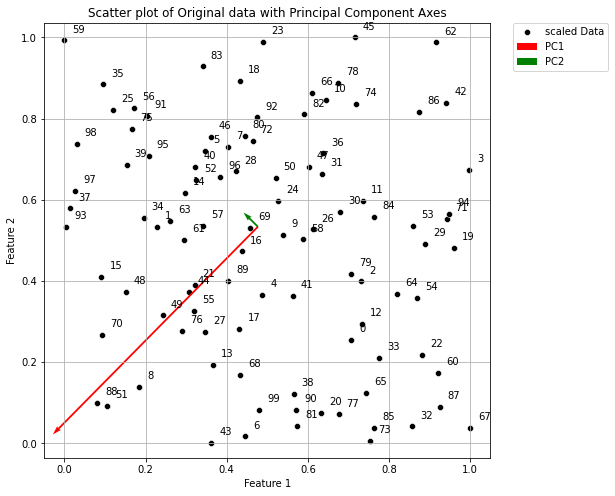

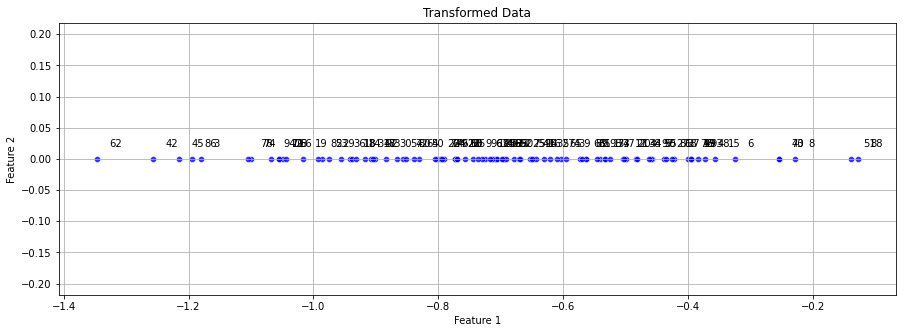

In [7]:
# Calculate the end points of the PC axes (scaled by the square root of the absolute eigenvalues)
pc_endpoints = eigenvectors * np.sqrt(np.abs(eigenvalues))

def Original():
    
    # Set the figure size
    plt.figure(figsize=(8, 8))

    # Plot the original standardized data points
    sns.scatterplot(x=x['X'], y=x['Y'], label='scaled Data', color='black')

    #Plot the PC axes on the original standardized data
    origin = x.median(axis=0)
    arrow_scale = 1
    arrow_width = 0.004
    plt.quiver(*origin, *pc_endpoints[:, 0], label='PC1', color='red', scale=arrow_scale, width=arrow_width)
    plt.quiver(*origin, *pc_endpoints[:, 1], label='PC2', color='green', scale=arrow_scale, width=arrow_width)

    for i in range(og_data.shape[0]):
        plt.text(x=x['X'][i]+0.02,y=x['Y'][i]+0.02,s=x.index[i])


    # Customize the plot
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title('Scatter plot of Original data with Principal Component Axes')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

def Transformed():
    
    # Set the figure size
    plt.figure(figsize=(15, 5))
    
    # Plot the transformed data points
    #X_proj_flatten = pd.DataFrame(X_proj)
    #X_proj_flatten = pd.DataFrame(X_proj.flatten())
    transformed_y = [0] * len(X_proj)
    sns.scatterplot(x=X_proj[0], y=transformed_y, color='blue', alpha=0.8)

    for i in range(X_proj.shape[0]):
        plt.text(x=X_proj[0][i]+0.02,y=transformed_y[i]+0.02,s=X_proj.index[i])
        
    # Customize the plot
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Transformed Data')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
Original()
Transformed()

In [8]:
X_proj_1D = X_proj.to_numpy().flatten()
#X_proj_1D = X_proj.flatten()[::-1]
dist_matrix = pd.DataFrame(squareform(pdist(X_proj_1D[:, np.newaxis], metric='euclidean')))

# Scale the distance matrix between 0 and 1
#dist_matrix_scaler = MinMaxScaler(feature_range=(0, 1))
#dist_matrix_scaled = dist_matrix_scaler.fit_transform(dist_matrix)
#dist_matrix_scaled = pd.DataFrame(dist_matrix_scaler.fit_transform(dist_matrix))

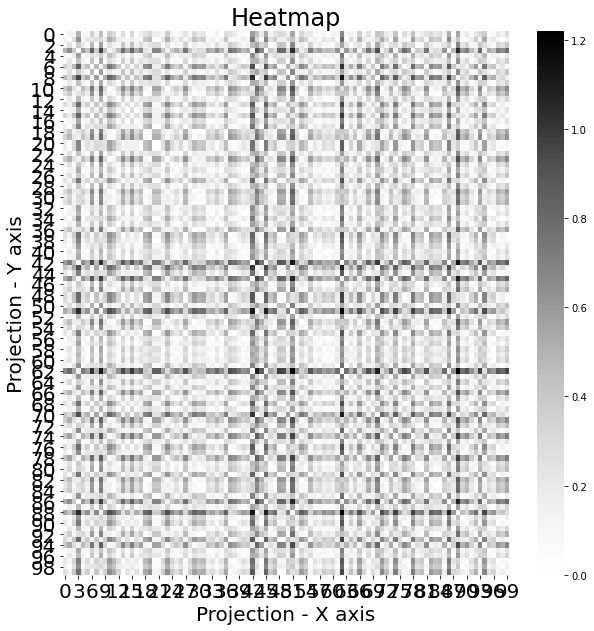

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(dist_matrix, cmap='Greys', annot=False, annot_kws={"size": 10})

title_fontsize = 24
label_fontsize = 20

plt.title('Heatmap', fontsize=title_fontsize)
plt.xlabel('Projection - X axis', fontsize=label_fontsize)
plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=label_fontsize)
ax.tick_params(axis='y', labelsize=label_fontsize)

plt.show()

In [10]:
# Dump to CSV

dist_matrix.to_csv('COMAD_2dim.csv', index=False)